## Задача №4. Постройте дашборд в dash

Дана таблица истории состояния игровой индустрии [games.csv](https://drive.google.com/file/d/1QXvqgwjo_PJixFRcapKhjyca_Cd-58pr/view?usp=sharing).   
***Описание полей:***
- Name - название проекта;
- Platform - платформа;
- Year_of_Release - год выпуска;
- Genre - жанр игры;
- Critic_Score - оценка критиков;
- User_Score - оценка игроков;
- Rating - возрастной рейтинг.

Из данных нужно исключить проекты ранее 2000 года и позднее 2022 и проекты, для которых имеются пропуски данных в любой из колонок.  
Используя dash (plotly), постройте дашборд по этому макету:

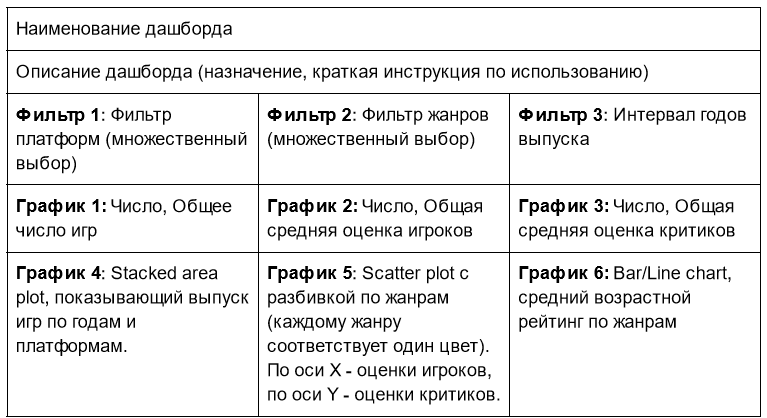


Графики должны реагировать на изменения значений всех трех фильтров одновременно.   
В графике 6 нужно перевести рейтинг в числовой вид и рассчитывать средние значения так.

Результат должен представлять собой py-файл, написанный на python3.

Файл с данными должен читаться из той же папки, где находится файл дашборда.
Название файла дашборда: games_market_dash_ВАШИ_ИМЯ_ФАМИЛИЯ.py. Например, games_market_dash_Ivan_Ivanov.py


In [1]:
# load all libs for project
import pandas as pd

In [2]:
# load files
try:
    df = pd.read_csv('G:/My Drive/Тестовые задания/Valiotti_test_sql_Py_dash/games.csv')  
    
except:
    print("Could not load data from file 'games.csv'")

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Critic_Score     8137 non-null   float64
 5   User_Score       10015 non-null  object 
 6   Rating           9950 non-null   object 
dtypes: float64(2), object(5)
memory usage: 914.4+ KB


In [5]:
df.describe

<bound method NDFrame.describe of                                 Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

     

In [6]:
df.duplicated().sum()

2

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

Name                  1
Platform              0
Year_of_Release     269
Genre                 1
Critic_Score       8581
User_Score         6703
Rating             6768
dtype: int64

In [9]:
# Remove rows with any missing data
df.dropna(inplace=True)

In [10]:
df = df.rename(columns={"Name":"game_title"}) 
df.columns = df.columns.str.lower()

In [11]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['critic_score'] = df['critic_score'].astype(int)

In [12]:
# Filter data
df = df[(df['year_of_release'] >= 2000) & (df['year_of_release'] <= 2022)]

In [13]:
df['genre'].unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

In [14]:
df['user_score'].unique()

array(['8', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2',
       '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9',
       '6.4', '7.8', '7.5', '2.6', '7.2', '7', '7.3', '4.3', '7.6', '5.7',
       '5', '9.1', '6.5', '8.8', '6.9', '6.8', '6.1', '6.7', '5.4', '4',
       '9.3', '6.2', '4.2', '6', 'tbd', '9.2', '4.9', '3.7', '4.1', '5.8',
       '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1', '2.9', '9.4',
       '5.2', '3.3', '4.5', '5.1', '3.5', '2.5', '1.9', '2.2', '2', '9.5',
       '4.7', '2.1', '3.6', '1.8', '3.8', '3', '9.6', '2.8', '1.7', '2.7',
       '2.4', '1.5', '1.2', '2.3', '0.5', '0.6', '0.9', '1', '1.4', '1.3',
       '0.7'], dtype=object)

In [15]:
tbd = df.loc[df['user_score'] == 'tbd']
tbd.head()

,game_title,platform,year_of_release,genre,critic_score,user_score,rating
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,61,tbd,E10+
645,uDraw Studio,Wii,2010,Misc,71,tbd,E
821,The Incredibles,GBA,2004,Action,55,tbd,E
1047,Tetris Worlds,GBA,2001,Puzzle,65,tbd,E
1069,Personal Trainer: Math,DS,2007,Puzzle,63,tbd,E


In [16]:
len(tbd)

1045

Беглый поиск в гугле подсказал, что значение пользовательского рейтинга 'tbd' может быть понято, как to be done - будет сделано, встречается в 1045 строчках датасета. Скорее всего это произошло поскольку данные игры не продавались или не продались достаточно широко в мире или были в основном представлены в одном географическом сегменте. Удалять эти данные будет неправильно, поскольку для анализа факторов, влияющих на успех того или иного IP данные о провалах весьма важны. Поэтому записи "tbd" заменены на нулевой рейтинг и тип данных в столбце приведен в float.

In [17]:
df['user_score'] = df['user_score'].replace("tbd", 0)
df['user_score'] = df['user_score'].astype(float)

In [18]:
# Convert Rating to numerical values
rating_map = {'E': 6, 'E10+': 10, 'T': 13, 'M': 17, 'AO': 18, 'RP': 0}
df['rating_numeric'] = df['rating'].map(rating_map)


In [19]:
df

,game_title,platform,year_of_release,genre,critic_score,user_score,rating,rating_numeric
0,Wii Sports,Wii,2006,Sports,76,8.0,E,6
2,Mario Kart Wii,Wii,2008,Racing,82,8.3,E,6
3,Wii Sports Resort,Wii,2009,Sports,80,8.0,E,6
6,New Super Mario Bros.,DS,2006,Platform,89,8.5,E,6
7,Wii Play,Wii,2006,Misc,58,6.6,E,6
...,...,...,...,...,...,...,...,...
16699,Planet Monsters,GBA,2001,Action,67,0.0,E,6
16700,Breach,PC,2011,Shooter,61,5.8,T,13
16701,Bust-A-Move 3000,GC,2003,Puzzle,53,0.0,E,6
16702,Mega Brain Boost,DS,2008,Puzzle,48,0.0,E,6


После исследования данных и первичной обработки в датасете осталось 7791 строка и 8 колонок, по количеству строк датасет сократился чуть больше чем в половину. Были удалены все строчки с пропусками, заменены все типы данных где возможно, содержание колонок приведено к подходящему виду, добавлена колонка rating_numeric, которая содержит числовое значение rating.  

In [20]:
# save DataFrame to CSV
df.to_csv('test_games_data.csv', index=False)